In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

TRAINING_DIR = '/content/drive/MyDrive/Four Disaster/Training'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)

VALIDATION_DIR = '/content/drive/MyDrive/Four Disaster/Testing'
validation_datagen = ImageDataGenerator(rescale= 1./255.)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)


Found 3544 images belonging to 4 classes.
Found 891 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
56/56 [==============================] - 1435s 25s/step - loss: 4.0302 - acc: 0.3374 - val_loss: 0.9525 - val_acc: 0.5410
Epoch 2/20
56/56 [==============================] - 152s 3s/step - loss: 1.1437 - acc: 0.5450 - val_loss: 1.0500 - val_acc: 0.5612
Epoch 3/20
56/56 [==============================] - 149s 3s/step - loss: 0.9250 - acc: 0.6587 - val_loss: 0.6766 - val_acc: 0.7609
Epoch 4/20
56/56 [==============================] - 148s 3s/step - loss: 0.7584 - acc: 0.6941 - val_loss: 1.2241 - val_acc: 0.5690
Epoch 5/20
56/56 [==============================] - 149s 3s/step - loss: 0.8000 - acc: 0.7070 - val_loss: 0.9085 - val_acc: 0.6914
Epoch 6/20
56/56 [==============================] - 151s 3s/step - loss: 0.6787 - acc: 0.7426 - val_loss: 0.6013 - val_acc: 0.7654
Epoch 7/20
56/56 [==============================] - 147s 3s/step - loss: 0.5780 - acc: 0.7934 - val_loss: 1.1101 - val_acc: 0.6588
Epoch 8/20
56/56 [==============================] - 151s 3s/step - loss: 0.6091 -

Text(0.5, 1.0, 'Training and validation loss')

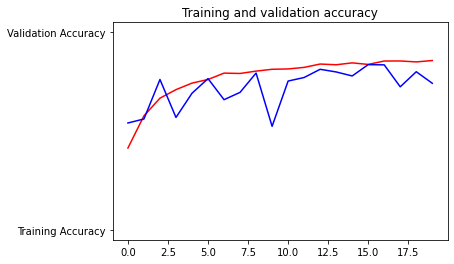

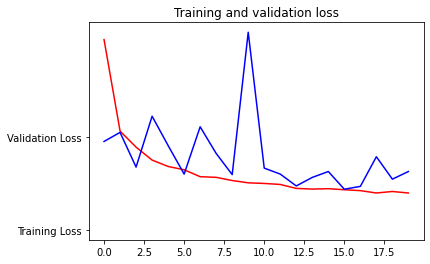

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)